In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

df = pd.read_csv('synthetic_abortion_data.csv')
df.head()

,Patient_ID,Gestation_at_Abortion_Weeks,Method_of_Abortion,Travel_Out_of_State,Abortion_Success,Medical_Complications_to_Mother,Medical_Complications_to_Child,Age_of_Mother,Relationship_Status,Race,Economic_Status,Insurance,Year,State,Political_Affiliation_of_State,Legal_Status_of_Abortion,State_Regulations
0,1,11.5,Surgical,False,True,NaN,NaN,22,Widowed,Asian,High Income,Other,2021,Alaska,Republican,Legal,Low
1,2,9.6,Surgical,True,True,NaN,NaN,23,Widowed,Asian,Low Income,Private Insurance,2024,Nebraska,Republican,Restricted,High
2,3,8.4,Other,False,True,NaN,NaN,14,Widowed,Non-Hispanic White,Middle Income,Military Insurance,2015,Missouri,Republican,Banned,High
3,4,9.6,Medical,True,True,NaN,NaN,18,Divorced,Pacific Islander,Low Income,Military Insurance,2021,Wyoming,Republican,Legal,Moderate
4,5,8.7,Medical,False,True,NaN,NaN,45,Cohabitating,Pacific Islander,On government assistance,Military Insurance,2018,South Carolina,Republican,Legal,Moderate


In [63]:
df_encoded = pd.read_csv('encoded_abortion_data.csv')
df_encoded.head()

,Patient_ID,Gestation_at_Abortion_Weeks,Age_of_Mother,Year,Relationship_Status_Cohabitating,Relationship_Status_Divorced,Relationship_Status_Married,Relationship_Status_Single,Relationship_Status_Widowed,Race_Asian,...,Medical_Complications_to_Child_Birth asphyxia,Medical_Complications_to_Child_Cleft lip or palate,Medical_Complications_to_Child_Congenital heart defects,Medical_Complications_to_Child_Down syndrome,Medical_Complications_to_Child_Intrauterine growth restriction (IUGR),Medical_Complications_to_Child_Jaundice,Medical_Complications_to_Child_No,Medical_Complications_to_Child_Other,Medical_Complications_to_Child_Premature birth,Medical_Complications_to_Child_Still Born
0,1,11.5,22,2021,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
1,2,9.6,23,2024,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
2,3,8.4,14,2015,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,4,9.6,18,2021,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,5,8.7,45,2018,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [64]:
access_cols = [col for col in df_encoded.columns if any(keyword in col for keyword in ['Legal_Status_of_Abortion', 'State_Regulations'])]
df_access = df_encoded[access_cols]

df_access['State'] = df['State']  # Add back unencoded State column
df_state_avg = df_access.groupby('State').mean()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_state_avg)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['State'] = df_state_avg.index
pca_df = pca_df.sort_values(by='State').reset_index(drop=True)
pca_df['State_group'] = (pca_df.index // 10) + 1

/tmp/ipykernel_3266/1647779550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_access['State'] = df['State']  # Add back unencoded State column


In [65]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=df_state_avg.columns
)

# Sort features by absolute contribution to PC1 and PC2
top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(3)
top_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(3)

# Print top contributing features
print("Top PC1 features:")
print(top_pc1)

print("\nTop PC2 features:")
print(top_pc2)

Top PC1 features:
Legal_Status_of_Abortion_Legal     0.540602
State_Regulations_High             0.522721
Legal_Status_of_Abortion_Banned    0.470722
Name: PC1, dtype: float64

Top PC2 features:
State_Regulations_Moderate             0.702795
State_Regulations_Low                  0.515194
Legal_Status_of_Abortion_Restricted    0.406289
Name: PC2, dtype: float64


In [66]:
#each set of 10 states is a diff shape and color
shape_map = {1: 'o', 2: 's', 3: 'X', 4: 'P', 5: 'D'}  # dot, square, X, plus-filled, diamond
group_labels = {1: 'Group 1', 2: 'Group 2', 3: 'Group 3', 4: 'Group 4', 5: 'Group 5'}

# 10 diff colors to make them more noticeable
palette = sns.color_palette("tab20", n_colors=50)


# Plot 
plt.figure(figsize=(10, 10))
custom_legends = []

for group in range(1, 6):
    subset = pca_df[pca_df['State_group'] == group]
    marker = shape_map[group]
    colors = palette[(group-1)*10 : group*10]  # 10 unique colors per group

    for idx, (i, row) in enumerate(subset.iterrows()):
        color = colors[idx % 10]
        plt.scatter(row['PC1'], row['PC2'], color=color, marker=marker, s=100)
        state_name = row['State']
        custom_legends.append(Line2D(
            [0], [0], 
            marker=marker, color='w', label=f"{group_labels[group]}: {state_name}",
            markerfacecolor=color, markersize=10
        ))
#legend to help show which state is which
from collections import defaultdict
grouped = defaultdict(list)
for handle in custom_legends:
    group_name, state_label = handle.get_label().split(": ", 1)
    grouped[group_name].append(Line2D([0], [0], marker=handle.get_marker(), color='w',
                                      markerfacecolor=handle.get_markerfacecolor(),
                                      label=state_label, markersize=10))

legend_handles = []
for group_name, states in grouped.items():
    legend_handles.append(mpatches.Patch(color='none', label=group_name))  # Group header
    legend_handles.extend(states)

plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Legend')
plt.title('PCA of Abortion Access Features by State')
plt.xlabel('Principal Component 1: Legal Status of Abortion')
plt.ylabel('Principal Component 2: Regulation Status of Abortion Per State')
plt.show()

KeyError: 'State_group'

<Figure size 1000x1000 with 0 Axes>

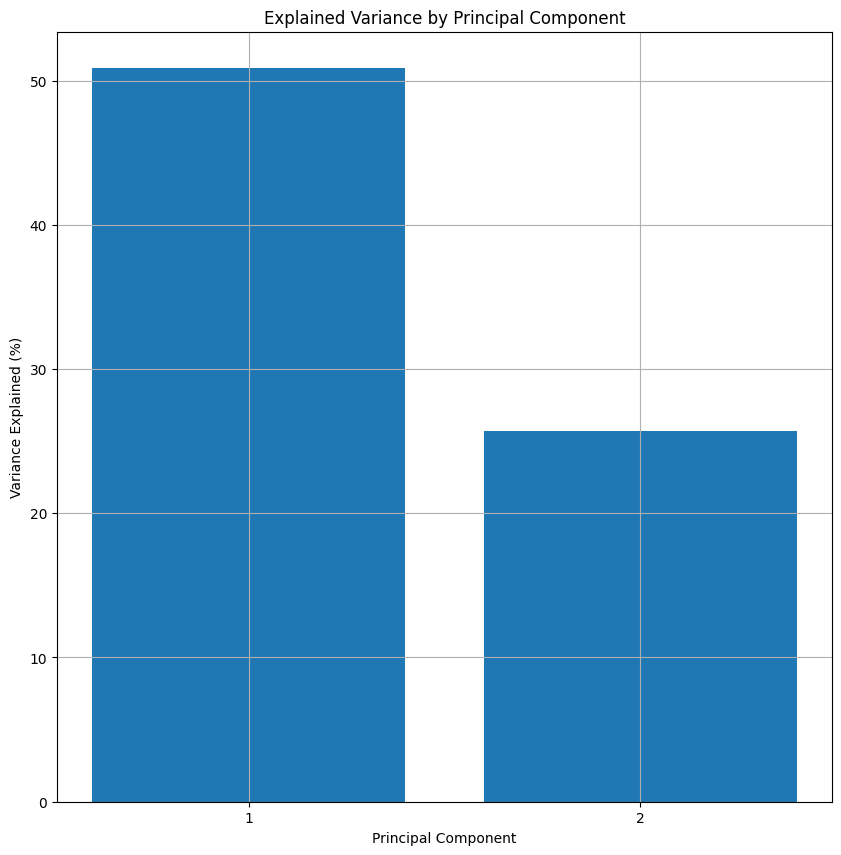

In [47]:
# After PCA
explained_var = pca.explained_variance_ratio_
components = np.arange(1, len(explained_var) + 1)

plt.figure(figsize=(10, 10))
plt.bar(components, explained_var * 100)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(components)
plt.grid(True)
plt.show()

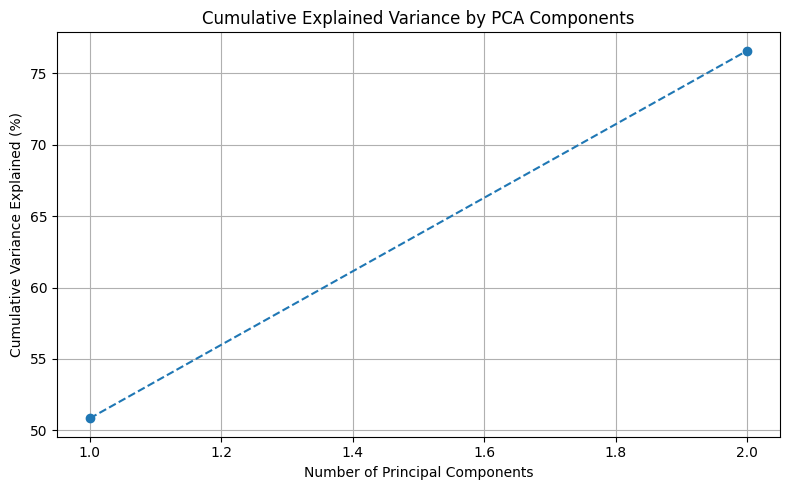

In [37]:
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), cumulative_var * 100, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid(True)
plt.tight_layout()
plt.show()